In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
emp_health = pd.read_csv("C:\\Users\\manas\\OneDrive\\Desktop\\PGP\\MINI Project\\NPV\\emp_health.csv")

In [10]:
emp_health

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
0,i10012,19,female,27.900,0,daily,yes,southwest,16884.92400
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...,...
1333,i11345,50,male,30.970,3,no,no,west,10600.54830
1334,i11346,18,female,31.920,0,daily,no,east,2205.98080
1335,i11347,18,female,36.850,0,weekend,no,southeast,1629.83350
1336,i11348,21,female,25.800,0,party,no,southwest,2007.94500


In [11]:
emp_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           1338 non-null   object 
 1   age          1338 non-null   int64  
 2   sex          1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   dependent    1338 non-null   int64  
 5   alcohol      1338 non-null   object 
 6   smoke        1338 non-null   object 
 7   zone         1338 non-null   object 
 8   expenditure  1338 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 94.2+ KB


# 1. How many employees above 50 age smoke, what is their average expenditure on health management?


In [12]:
emp_health[(emp_health['age']>50) & (emp_health['smoke']=='yes')].expenditure.mean()

38820.22308234375

# 2. How many female employees did not consume alcohol daily. What is their proportion with respect to total female employees?

In [13]:
emp_health[emp_health['sex']=='female']['alcohol'].value_counts() # Daily non-consuming alcohol of female is "112"
                                                                # 

daily      209
weekend    178
party      135
no         112
rarely      28
Name: alcohol, dtype: int64

# 3. Display zone wise average expenditure of employees on health

In [14]:
emp_health['expenditure'].mean()

13270.422265141257

# 4. Employees of which zone did maximum expenditure on health

In [15]:
emp_health[['zone','expenditure']].max() # west zone employee ID i11349 spend max expenditure is '63770.42801'

zone                  west
expenditure    63770.42801
dtype: object

In [16]:
emp_health[emp_health['zone']=='east']['expenditure'].nlargest()

577     58571.07448
330     48517.56315
674     46200.98510
845     45008.95550
1096    44641.19740
Name: expenditure, dtype: float64

# 5. What is the minimum expenditure done by any employee in organization

In [17]:
emp_health[['id','expenditure']].min() 

id                i10012
expenditure    1121.8739
dtype: object

# 6. What is average expenditure of employees who have 2 or lesser dependents

In [18]:
emp_health[emp_health['dependent']<=2]['expenditure'].mean()

13040.970970948145

# 7. How many employees are below age of 20 years. What is their average BMI

In [19]:
emp_health[emp_health['age']<20]['bmi'].mean() 

29.971496350364966

# 8. Create a dataframe "non_smoker" for all non-smoker male employees

In [24]:
ad = emp_health[(emp_health['smoke']=='no') & (emp_health['sex']=='male')]

In [25]:
New_Nonsmoker = pd.DataFrame(ad)

In [26]:
New_Nonsmoker 

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
1,i10013,18,male,33.770,1,weekend,no,south,1725.55230
2,i10014,28,male,33.000,3,rarely,no,south,4449.46200
3,i10015,33,male,22.705,0,daily,no,northwest,21984.47061
4,i10016,32,male,28.880,0,party,no,northwest,3866.85520
8,i10020,37,male,29.830,2,party,no,north,6406.41070
...,...,...,...,...,...,...,...,...,...
1324,i11336,31,male,25.935,1,daily,no,west,4239.89265
1325,i11337,61,male,33.535,0,party,no,east,13143.33665
1327,i11339,51,male,30.030,1,daily,no,southeast,9377.90470
1329,i11341,52,male,38.600,2,party,no,southwest,10325.20600


# 9. Create a dataframe "non_alcoholic" for all male employees who do not consume alcohol

In [30]:
ad = emp_health[(emp_health['alcohol']=='no') & (emp_health['sex']=='male')]

In [31]:
New_Non_alcohol = pd.DataFrame(ad)

In [32]:
New_Non_alcohol 

,id,age,sex,bmi,dependent,alcohol,smoke,zone,expenditure
18,i10030,56,male,40.300,0,no,no,southwest,10602.38500
24,i10036,37,male,28.025,2,no,no,northwest,6203.90175
28,i10040,23,male,17.385,1,no,no,northwest,2775.19215
37,i10049,26,male,20.800,0,no,no,southwest,2302.30000
38,i10050,35,male,36.670,1,no,yes,north,39774.27630
...,...,...,...,...,...,...,...,...,...
1291,i11303,19,male,34.900,0,no,yes,southwest,34828.65400
1301,i11313,62,male,30.875,3,no,yes,west,46718.16325
1310,i11322,42,male,26.315,1,no,no,west,6940.90985
1320,i11332,31,male,31.065,3,no,no,west,5425.02335


#  10. Create a dataframe called "non_smoking_alcoholic" with the men employees who do not smoke and consume alcohol. The dataframe should contain columns id, smoke, alcohol

In [33]:
non_smoking_alcoholic = pd.merge(New_df_Nonsmoker,New_df_Non_alcohol,how='inner').drop(['sex','age','bmi','dependent','zone','expenditure'],axis=1)

In [34]:
non_smoking_alcoholic 

,id,alcohol,smoke
0,i10030,no,no
1,i10036,no,no
2,i10040,no,no
3,i10049,no,no
4,i10079,no,no
...,...,...,...
104,i11273,no,no
105,i11282,no,no
106,i11322,no,no
107,i11332,no,no


# 11.What is the count for each zone with respect to number of dependent

In [35]:
emp_health.groupby('zone')['dependent'].value_counts()


zone       dependent
east       0            124
           1             65
           2             42
           3             22
           4              6
           5              3
north      0             26
           1             20
           3             12
           2             10
           4              1
           5              1
northeast  0             35
           2             15
           3             13
           1              9
           4              2
northwest  0             70
           2             30
           1             28
           3             13
           4              4
south      0             38
           1             21
           2             12
           3             12
           4              1
southeast  0             81
           1             57
           2             38
           3             15
           5              5
           4              2
southwest  0            116
           1             53

# 12. Classify the employees into 3 categories.
 Category 1 : employees below 18.5 bmi - underweight
 Category 2 : employees with bmi in the range of 18.5 to 24.9 - fit
 Category 3 : employee with bmi over 24.9 - overweight
 What is the average expenditure of employees in each category.
 Display the bar chart for the same


In [36]:
avg_exp = emp_health[emp_health['bmi']<18.5]['expenditure'].mean()


In [37]:
avg_exp_2= emp_health[(emp_health['bmi']==18.5) & (emp_health['bmi']<24.9)]['expenditure'].mean()

In [38]:
avg_exp_2

4766.022

In [39]:
avg_exp_3 = emp_health[emp_health['bmi']>24.9]['expenditure'].mean()

In [40]:
avg_exp_3

13936.616823466235

In [41]:
bmi_category = ['bmi_under weight','bmi_fit','bmi_overweigth']
avg_expenditure = [8852.200585000002,4766.022,13936.616823466235]

In [42]:
data = {'bmi_category': ['bmi_under weight','bmi_fit','bmi_overweigth'],'avg_expenditure':[8852.200585000002,4766.022,13936.616823466235]}

In [43]:
data_bmi_expen = pd.DataFrame(data)

In [44]:
data_bmi_expen

,bmi_category,avg_expenditure
0,bmi_under weight,8852.200585
1,bmi_fit,4766.022000
2,bmi_overweigth,13936.616823


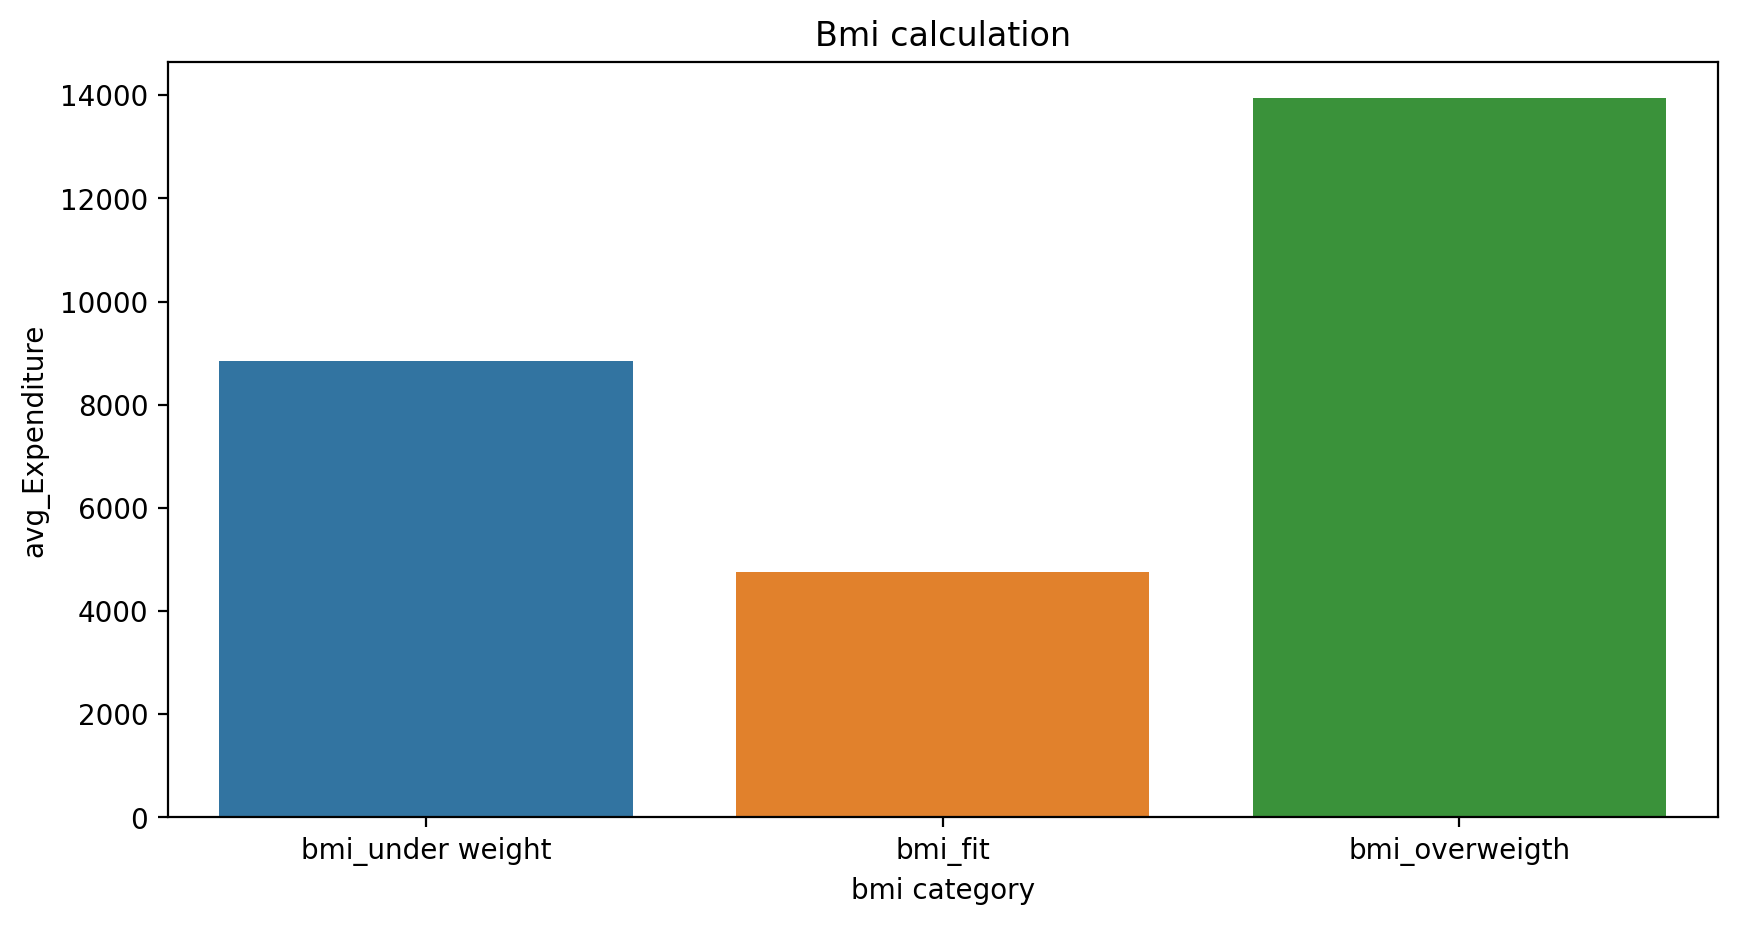

In [45]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=bmi_category,y=avg_expenditure,data=emp_health) 
plt.xlabel('bmi category')
plt.ylabel('avg_Expenditure')

plt.title('Bmi calculation')
plt.show()

# 13. Draw line plot of expenditure against age and BMI

In [46]:
emp_health[['age','bmi','expenditure']]

,age,bmi,expenditure
0,19,27.900,16884.92400
1,18,33.770,1725.55230
2,28,33.000,4449.46200
3,33,22.705,21984.47061
4,32,28.880,3866.85520
...,...,...,...
1333,50,30.970,10600.54830
1334,18,31.920,2205.98080
1335,18,36.850,1629.83350
1336,21,25.800,2007.94500


D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


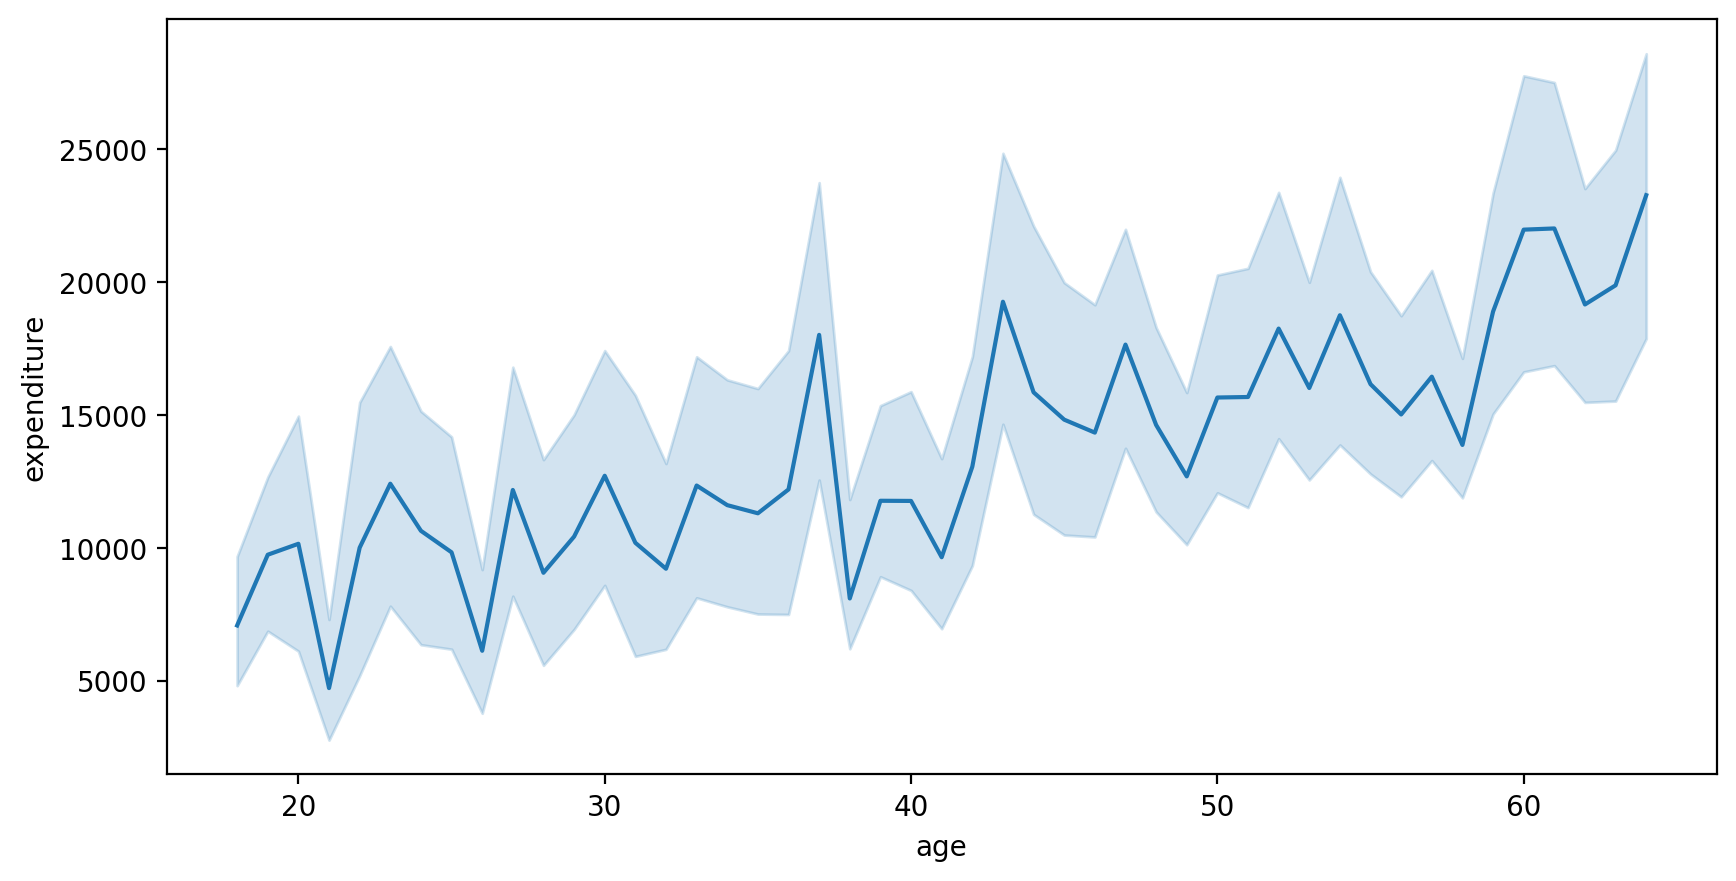

In [47]:
plt.figure(figsize=(10,5),dpi=200)
sns.lineplot(emp_health.age,emp_health.expenditure,data=emp_health)
plt.show();



# 14. Draw a bar chart to show zone wise average expenditure

In [48]:
zone = ['east','north','northeast','northwest','south','southeast','southwest','west']
expen = [13774.679941,14102.583403,13694.721724,12151.702619,14715.689519,14452.949680,12717.083869,12182.998872]

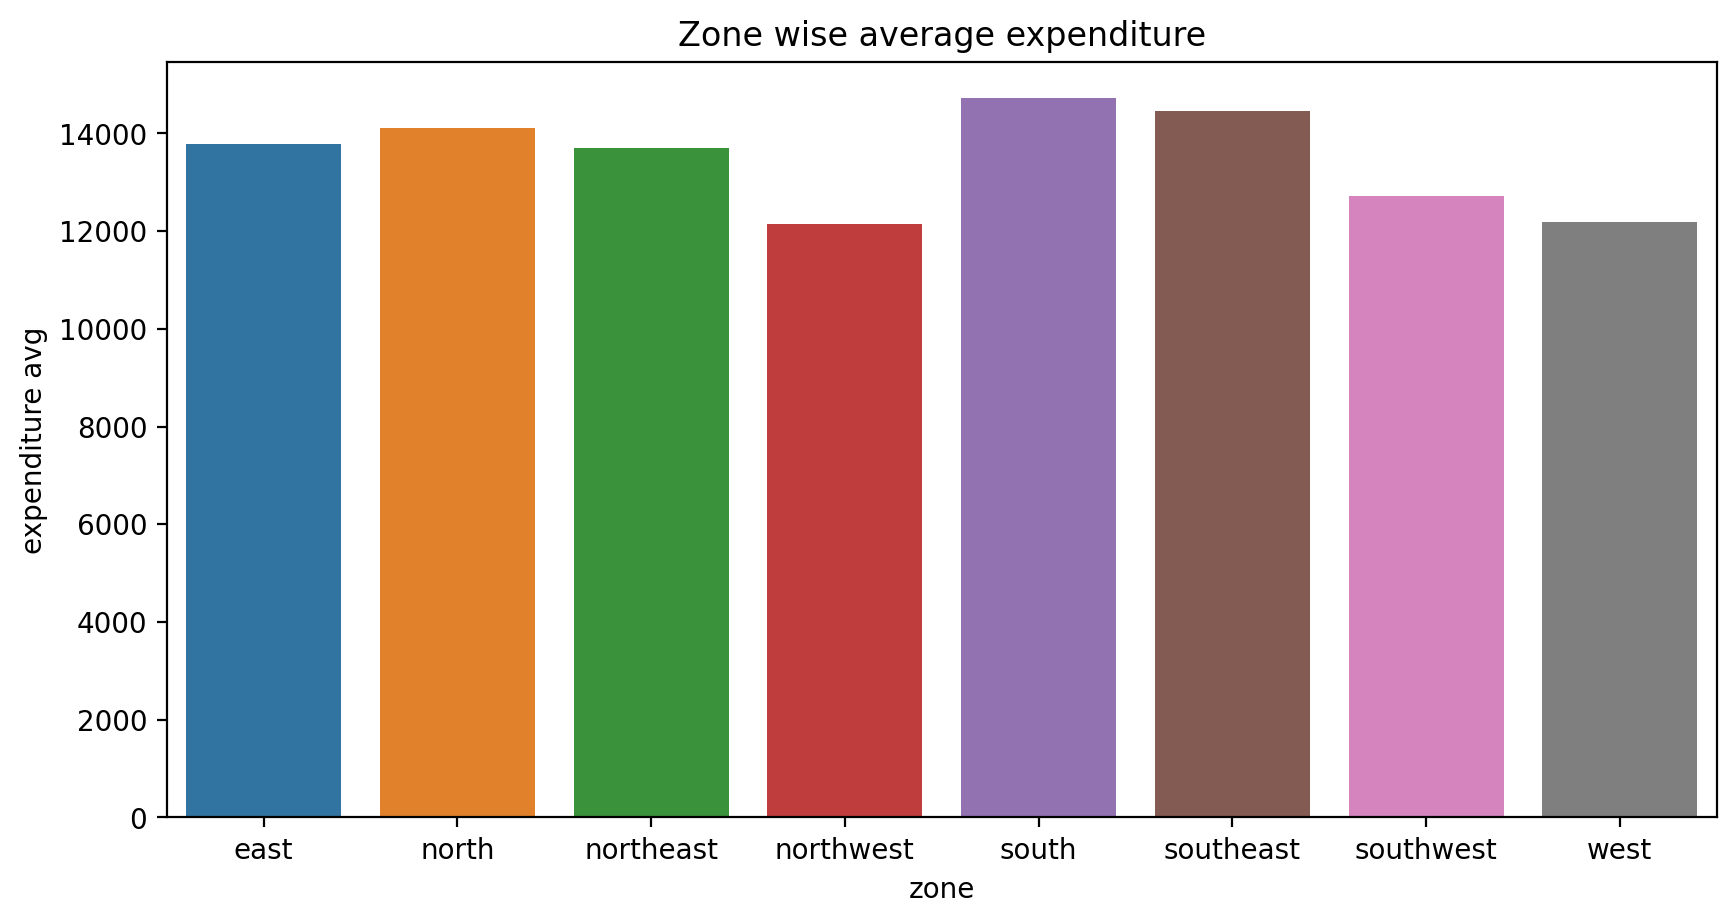

In [49]:

plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=zone,y=expen,data=emp_health) #a bar chart to shown zone wise average expenditure
plt.xlabel('zone')
plt.ylabel('expenditure avg')
plt.title('Zone wise average expenditure')
plt.show()

#  15. Draw a bar chart to show smoking and alcoholic habits against average expenditure

In [50]:
smoke_alcohol = ['no_smoke','yes_smoke','al_daily','al_weekend','al_party','al_no','al_rarely'] 
expend = [8434.268298,32050.231832,13001.772968,14277.090885,13050.583157,12419.686784,13145.632539]

In [51]:
emp_health.groupby(['smoke','alcohol'])['expenditure'].mean()

smoke  alcohol
no     daily       8462.115558
       no          8628.618182
       party       8295.247250
       rarely      5785.022944
       weekend     8784.631185
yes    daily      31160.402608
       no         32224.657378
       party      31487.938163
       rarely     31881.367379
       weekend    33592.294629
Name: expenditure, dtype: float64

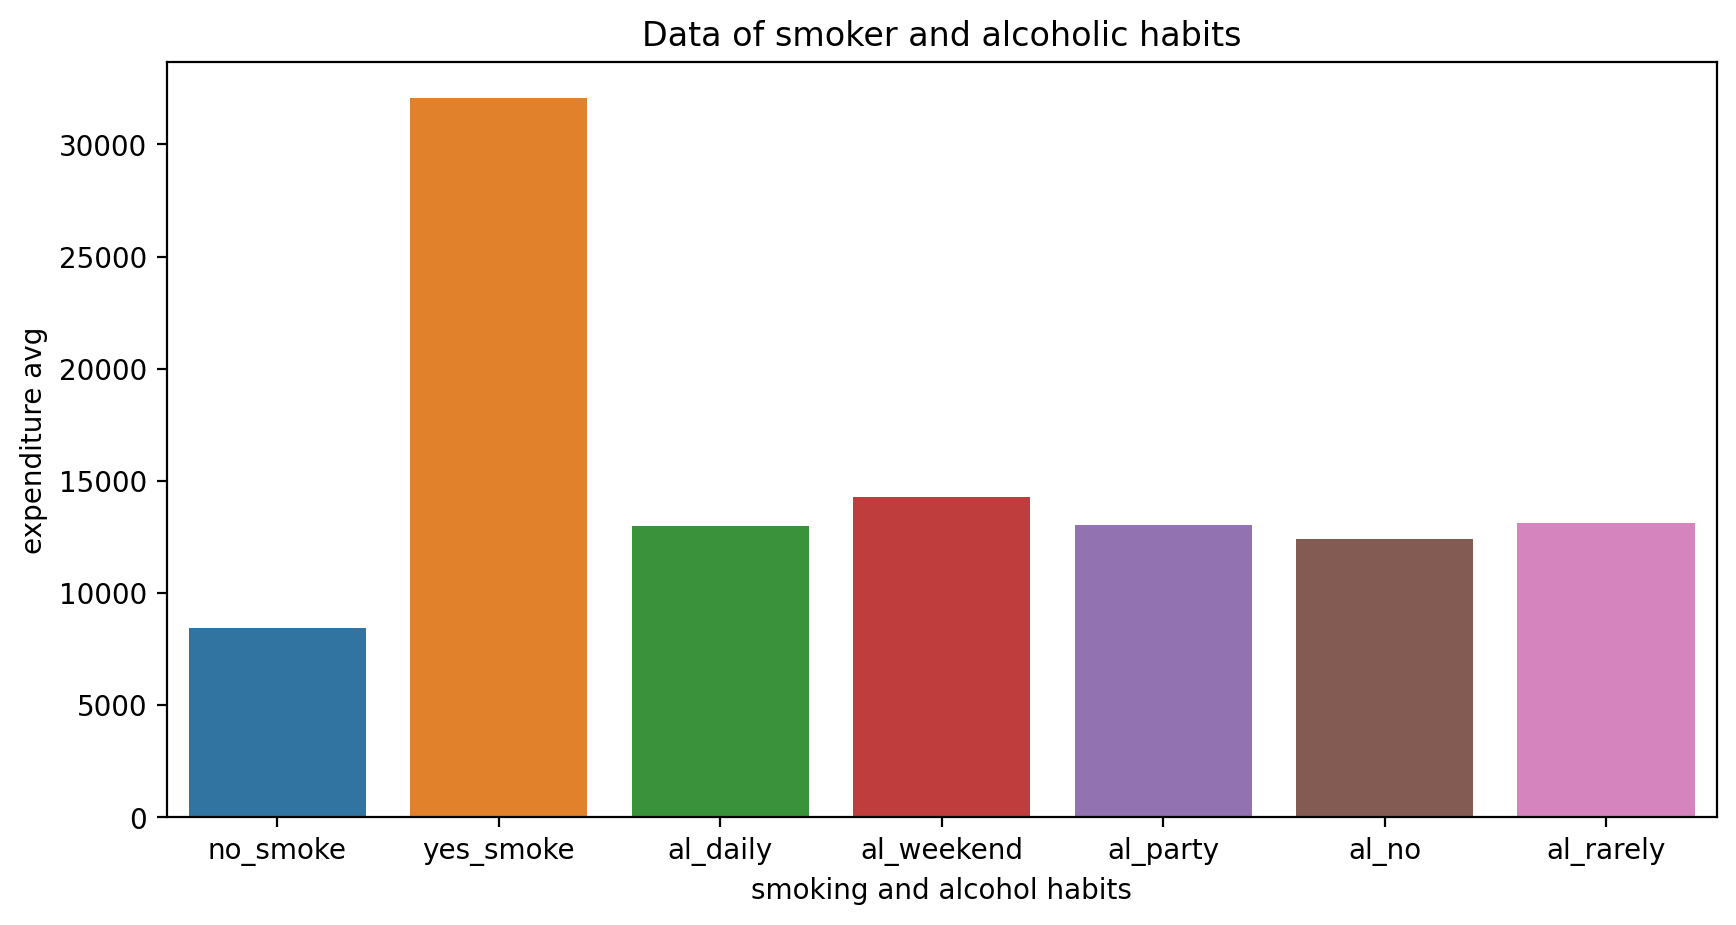

In [52]:
plt.figure(figsize=(10,5),dpi=200)
sns.barplot(x=smoke_alcohol,y=expend,data=emp_health)
plt.xlabel('smoking and alcohol habits')
plt.ylabel('expenditure avg')
plt.title('Data of smoker and alcoholic habits')

plt.show()

# 16. Draw pie chart for alcohol consumption habits

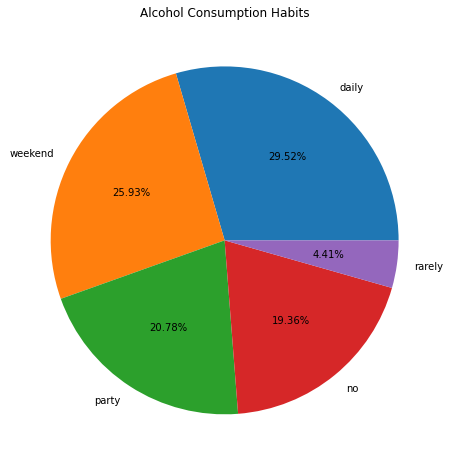

In [53]:
alcohol_habits_labels = ['daily','weekend','party','no','rarely']
alcohol_habits_values = emp_health.alcohol.value_counts()

plt.figure(figsize=(12,8))

plt.pie(alcohol_habits_values, labels=alcohol_habits_labels,autopct='%1.2f%%')
plt.title('Alcohol Consumption Habits')

plt.show()

#  17. Draw scatterplot to see the relation between age and expenditure, keep smoking habit as hue

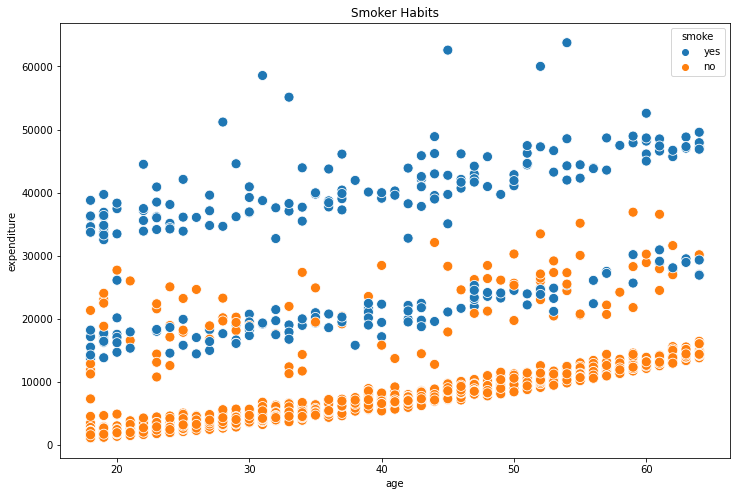

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='age',y='expenditure',data=emp_health,s=100,hue='smoke')
plt.title('Smoker Habits')
plt.show()

# 18. Draw distribution plot of expenditure

<Figure size 12000x4000 with 0 Axes>

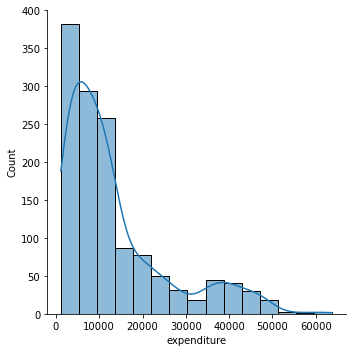

In [55]:
plt.figure(figsize=(12,4),dpi=1000)
sns.displot(data=emp_health,x=emp_health['expenditure'],bins=15,kde=True)
plt.show()

#  19. Display the pairplot

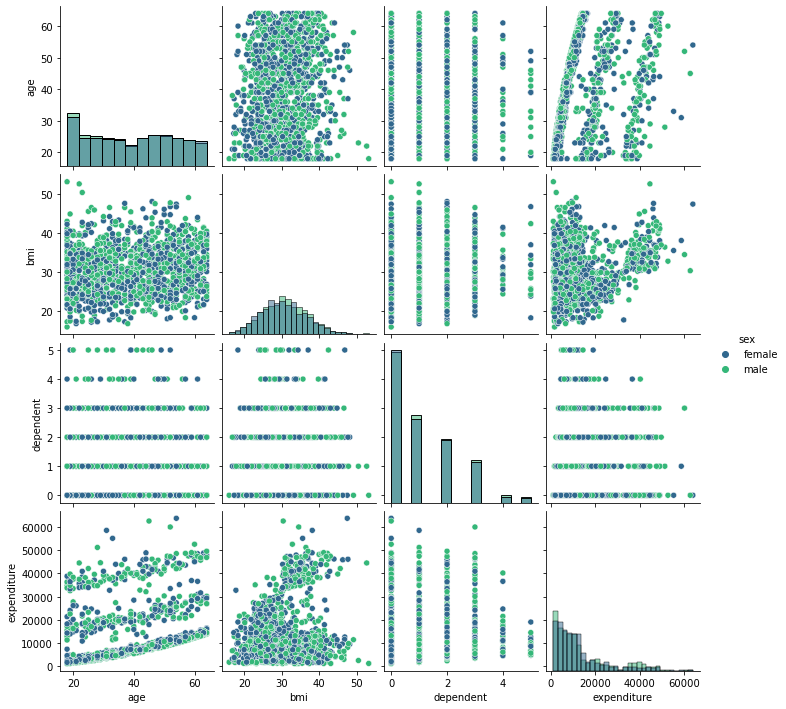

In [56]:
sns.pairplot(emp_health,hue='sex',palette='viridis',diag_kind='hist')

#  20. Display heatmap for the data

<AxesSubplot:>

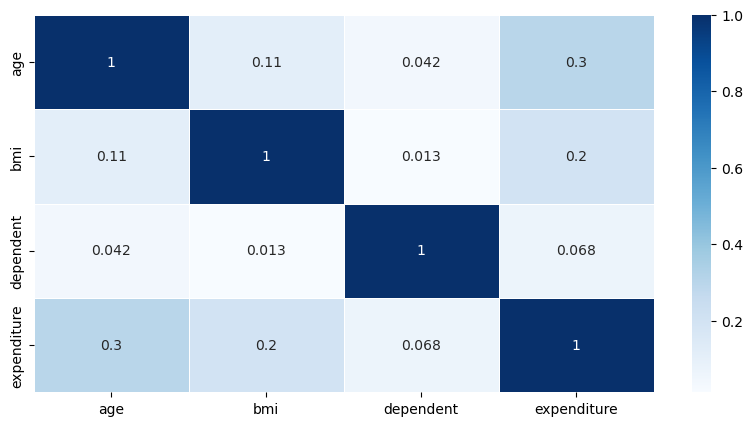

In [57]:
plt.figure(figsize=(10,5),dpi=100)
sns.heatmap(emp_health.corr(),annot=True,linewidth=0.5,cmap='Blues')